In [49]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Carregar os dados
x = pd.read_csv('Processed_data.csv')
y = pd.read_csv("grupos.csv")["group"]

# Criar os modelos
treeModel = DecisionTreeClassifier(random_state=42)
NBModel = GaussianNB()
MLPModel = MLPClassifier(random_state=42,max_iter=1000)


# Função para calcular o F1-score e a matriz de confusão
def evaluate_model(model, x, y):
    # Realizar a validação cruzada com 10 folds e prever as classes
    y_pred = cross_val_predict(model, x, y, cv=10)
    # Calcular o F1-score
    f1 = f1_score(y, y_pred, average='weighted')
    # Calcular a matriz de confusão
    cm = confusion_matrix(y, y_pred)
    return f1, cm

# Avaliar o modelo de árvore de decisão
tree_f1, tree_cm = evaluate_model(treeModel, x, y)
print("Árvore de Decisão:")
print("F1-score:", tree_f1)
print("Matriz de Confusão:")
print(tree_cm)

# Avaliar o modelo Naive Bayes
NB_f1, NB_cm = evaluate_model(NBModel, x, y)
print("\nNaive Bayes:")
print("F1-score:", NB_f1)
print("Matriz de Confusão:")
print(NB_cm)

# Avaliar o modelo MLP
MLP_f1, MLP_cm = evaluate_model(MLPModel, x, y)
print("\nMLP:")
print("F1-score:", MLP_f1)
print("Matriz de Confusão:")
print(MLP_cm)


Árvore de Decisão:
F1-score: 0.4439727290155185
Matriz de Confusão:
[[15  5  6  3  8  3  2  6]
 [ 8  5  4  4  6  1  0  2]
 [ 4  4  8  2  4  2  2  6]
 [ 0  0  0 40  0  0  0  0]
 [ 5  4  3  3 11  0  0  3]
 [ 5  2  3  5  1  9  1  1]
 [ 1  0  2  2  0  4 12  0]
 [ 3  3  1  0  3  0  0 19]]

Naive Bayes:
F1-score: 0.4232301407340896
Matriz de Confusão:
[[26  1  4  5  5  1  3  3]
 [ 8  3  2  6  8  1  0  2]
 [ 8  1 12  2  3  3  1  2]
 [ 9  2  0 14  3  3  9  0]
 [ 4  1  4  6 14  0  0  0]
 [ 0  0  4  6  1  9  7  0]
 [ 1  0  0  3  0  1 16  0]
 [ 3  2  2  1  3  0  0 18]]


C:\Users\tukeb\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tukeb\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tukeb\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tukeb\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warning


MLP:
F1-score: 0.44100043585269577
Matriz de Confusão:
[[21  4  9  4  3  1  3  3]
 [ 9  6  2  5  4  1  0  3]
 [ 5  1 16  1  2  4  1  2]
 [ 9  1  0 21  2  3  4  0]
 [ 7  4  2  3 10  0  0  3]
 [ 0  0  4  7  1 13  2  0]
 [ 1  0  0  7  0  2 11  0]
 [ 4  3  3  0  2  1  0 16]]


C:\Users\tukeb\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


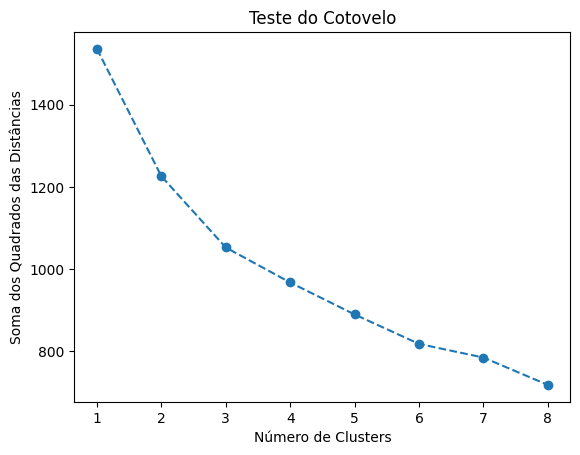

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregar os dados
x = pd.read_csv('Processed_data.csv')

# Normalizar os dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Calcular a soma dos quadrados das distâncias para diferentes números de clusters
wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do teste do cotovelo
plt.plot(range(1, 9), wcss, marker='o', linestyle='--')
plt.title('Teste do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados das Distâncias')
plt.show()
